In [204]:
import pandas as pd
import numpy as np
import seaborn as sns

In [157]:
comments = pd.read_excel("Datasets/comment.xlsx", usecols=['comment'])
products = pd.read_excel('Datasets/product.xlsx', usecols=['category_title_fa', 'category_keywords'])

In [84]:
comments.head()

,comment
0,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...
1,بوی تند ولی خوشبو داره.ماندگاریش خوبه و هر چقد...
2,متاسفانه عمر مفید این ماشین کم هست و بعد از دو...
3,افا از وقتی من اینو واسه پسرم خریدم همه بچه ها...
4,این تیغ محصول کشور آمریکا هست ( در عکس محصول م...


In [85]:
products.head()

,category_title_fa,category_keywords
0,ماگ، لیوان و فنجان,ماگ، لیوان و فنجان CupandMug
1,آبکش و آبگیر,آبکش و آبگیر VirgoBasin
2,روغن صورت,روغن صورت Face-Oil
3,سرویس خواب,سرویس خواب SleepSet
4,ماگ، لیوان و فنجان,ماگ، لیوان و فنجان CupandMug


In [158]:
from parsivar.normalizer import Normalizer
from parsivar.tokenizer import Tokenizer

values = np.hstack([products["category_title_fa"].dropna().values, 
                    products['category_keywords'].dropna().values])

all_words = " ".join(values)

tokenizer = Tokenizer()
tokens = tokenizer.tokenize_words(all_words)

words_set = set(tokens)
len(words_set)

2454

In [160]:
import re

keywords = []
normalizer = Normalizer()

def clean_text(text):
    text = str(text)
    cleaned_text = re.sub(r'[A-Za-z\d]+', ' ', text)
    cleaned_text = re.sub(r'^\u0600-\u06FF\s', ' ', cleaned_text)
    cleaned_text = re.sub(r'[^\w\s]', ' ', cleaned_text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    normed_text = normalizer.normalize(cleaned_text)
    
    if len(list(normed_text)) <= 512:
        return normed_text
    else:
        return np.nan

In [163]:
comments = comments.iloc[:10000]

cleaned_comments = comments["comment"].apply(clean_text).dropna()
cleaned_comments

1       بوی تند ولی خوشبو داره ماندگاریش خوبه و هر چقد...
2       متاسفانه عمر مفید این ماشین کم هست و بعد از دو...
3       افا از وقتی من اینو واسه پسرم خریدم همه بچه‌ها...
4       این تیغ محصول کشور آمریکا هست در عکس محصول مشخ...
5       سرعت گرم و علی‌الخصوص سرد کردن خیلی پایین هست ...
                              ...                        
9995             این فوق العاده است اگه تخری از دستت رفته
9996                   بدترین چراغ قوه‌ای که تا حالا دیدم
9997    سه جفت خروجی ولت کیفیت صدا اصلا قابل مقایسه با...
9998    این ادوتویلت بسیار شکیل و بوی خاص و ماندگاری خ...
9999    ظریف و نازک هست به همین علت زیر لباس معلوم نمی...
Name: comment, Length: 9321, dtype: object

In [164]:
cleaned_comments.to_csv('Datasets/cleaned_comments.csv')

### Labeling comments process on Google Colab
<a href="https://colab.research.google.com/drive/1nP4hc6OU-LKIJcjzDIQgrFeSFfq7VrgY?usp=sharing" style="color:red;">Colab Link</a>

In [274]:
labeled_comments = pd.read_csv('Datasets/labeled_comments.csv', index_col=0)
labeled_comments

,comment,labels,scores
0,بوی تند ولی خوشبو داره ماندگاریش خوبه و هر چقد...,happy,0.985857
1,متاسفانه عمر مفید این ماشین کم هست و بعد از دو...,angry,0.942945
2,افا از وقتی من اینو واسه پسرم خریدم همه بچه‌ها...,neutral,0.346233
3,این تیغ محصول کشور آمریکا هست در عکس محصول مشخ...,happy,0.996132
4,سرعت گرم و علی‌الخصوص سرد کردن خیلی پایین هست ...,delighted,0.995794
...,...,...,...
9316,این فوق العاده است اگه تخری از دستت رفته,delighted,0.919844
9317,بدترین چراغ قوه‌ای که تا حالا دیدم,delighted,0.479886
9318,سه جفت خروجی ولت کیفیت صدا اصلا قابل مقایسه با...,delighted,0.484131
9319,این ادوتویلت بسیار شکیل و بوی خاص و ماندگاری خ...,delighted,0.993633


In [254]:
unique_labels = np.unique(labeled_comments["labels"])
unique_labels

array(['angry', 'delighted', 'furious', 'happy', 'neutral'], dtype=object)

In [275]:
encoded_labels = {'angry': 2, 'furious': 2, 'happy': 1, 'delighted': 1, 'neutral': 0}
labeled_comments["labels"] = labeled_comments["labels"].map(encoded_labels)
labeled_comments

,comment,labels,scores
0,بوی تند ولی خوشبو داره ماندگاریش خوبه و هر چقد...,1,0.985857
1,متاسفانه عمر مفید این ماشین کم هست و بعد از دو...,2,0.942945
2,افا از وقتی من اینو واسه پسرم خریدم همه بچه‌ها...,0,0.346233
3,این تیغ محصول کشور آمریکا هست در عکس محصول مشخ...,1,0.996132
4,سرعت گرم و علی‌الخصوص سرد کردن خیلی پایین هست ...,1,0.995794
...,...,...,...
9316,این فوق العاده است اگه تخری از دستت رفته,1,0.919844
9317,بدترین چراغ قوه‌ای که تا حالا دیدم,1,0.479886
9318,سه جفت خروجی ولت کیفیت صدا اصلا قابل مقایسه با...,1,0.484131
9319,این ادوتویلت بسیار شکیل و بوی خاص و ماندگاری خ...,1,0.993633


In [276]:
labeled_comments.dropna(inplace=True)

<Axes: xlabel='labels', ylabel='count'>

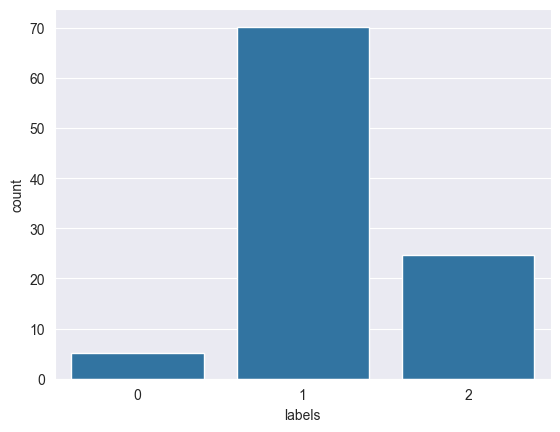

In [294]:
distributions = labeled_comments['labels'].value_counts() / len(labeled_comments) * 100
sns.barplot(distributions)

In [306]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

X = labeled_comments['comment']
y = labeled_comments['labels']

under_sampler = RandomUnderSampler(random_state=0)
X_new, y_new = under_sampler.fit_resample(X.values.reshape(-1, 1), y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [307]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(X_train.ravel())
X_test = vectorizer.transform(X_test.ravel())

### Train model for predicting labels

In [310]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(estimator=MultinomialNB(), n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.59      0.60        93
           1       0.64      0.69      0.66       117
           2       0.59      0.54      0.56        80

    accuracy                           0.62       290
   macro avg       0.61      0.61      0.61       290
weighted avg       0.62      0.62      0.62       290

